# Bootcamp IGTI - Desafio modulo 2

## Enunciado
Neste desafio serão abordados todos os conceitos apresentados durante a disciplina
Modelos Preditivos e Séries Temporais (MPT). Para este desafio será utilizada uma versão
modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/wine). Esse dataset contém um conjunto de
atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco).
Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho
obtido. Existem informações como o teor alcoólico e nível de acidez. Para este desafio é
necessário baixar o arquivo “winequality-red.data” presente no link abaixo:
‒ https://drive.google.com/open?id=13jSMzdwO3nZDr-n62--fO4jrE-oIG8cX

In [0]:
# importando a base de dados
from google.colab import files
upload = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
# importando as bibliotecas para uso do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

##Conhecendo o dataset

In [0]:
# carregando dataframe
df_winequality = pd.read_csv('winequality-red.csv', sep=';', encoding='utf-8')

In [0]:
# visualizando os 10 primeiros registros do dataframe
df_winequality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [0]:
# visualizando informações sobre as colunas e dados nulos
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
# visualizando estatisticas resumidas
df_winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##Pergunta 1 - No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [0]:
df_winequality.shape

(1599, 12)

##Pergunta 2 - Quantos tipos diferentes de dados existem no dataset do desafio?

In [0]:
df_winequality.dtypes.nunique()

2

## Pergunta 3 - Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?

In [0]:
(df_winequality['residual sugar'].isnull().sum()/len(df_winequality['residual sugar']))*100

0.0

##Pergunta 4 - Qual é o desvio padrão para a variável "fixed acidity" ?

In [0]:
df_winequality['fixed acidity'].std()

1.7410963181277006

##Pergunta 5 - Qual é a mediana para a variável "residual sugar"?

In [0]:
df_winequality['residual sugar'].median()

2.2

##Pergunta 6 - Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:

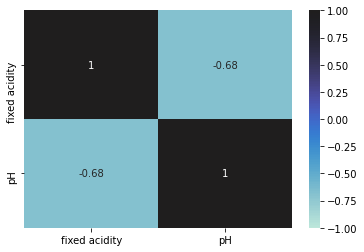

In [0]:
sn.heatmap(df_winequality[['fixed acidity', 'pH']].corr(), annot=True, vmin=-1, vmax=1, center= 1);
# existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".

##Pergunta - 7 Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":

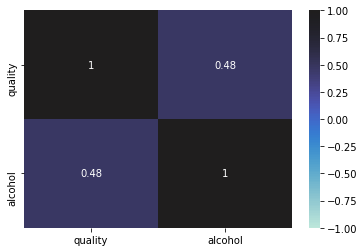

In [0]:
sn.heatmap(df_winequality[['quality', 'alcohol']].corr(), annot=True, vmin=-1, vmax=1, center= 1);
# quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).

##Pergunta 8 - Quantas instâncias existem para a qualidade do vinho igual a 5?

In [0]:
df_winequality['quality'].loc[df_winequality['quality'] == 5 ].count()

681

##Pergunta 9 - Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

In [0]:
escala = MinMaxScaler()
df_normalizado = pd.DataFrame(escala.fit_transform(df_winequality), columns=df_winequality.columns) 
df_normalizado['fixed acidity'].min()

0.0

##Pergunta 10 - Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?

In [0]:
x = df_normalizado[df_normalizado.columns[:-1]]
df_normalizado.quality = df_winequality.quality
y = df_normalizado[df_normalizado.columns[-1:]]

x_train, x_test, y_train , y_teste = train_test_split(x, y, test_size=0.30, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print('Score KNN: ', knn.score(x_test, y_teste))

Score KNN:  0.5645833333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


##Pergunta 11 - Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?

In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print('Score Arvore: ', dtc.score(x_test, y_teste))

Score Arvore:  0.5833333333333334


##Pergunta 12 - Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?

In [0]:
rfc = RandomForestClassifier(max_depth=10, random_state=1)
rfc.fit(x_train, y_train)
print('Score Random Forest: ', rfc.score(x_test, y_teste))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score Random Forest:  0.6791666666666667


##Pergunta 13 - Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?

In [0]:
svc = SVC(gamma='auto', kernel='rbf')
svc.fit(x_train, y_train)
print('Score SVM: ', svc.score(x_test, y_teste))

Score SVM:  0.5854166666666667


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Pergunta 14 - Apicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?

In [0]:
mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(x_train, y_train)
print('Acurácia MLP: ', mlp.score(x_test, y_teste))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia MLP:  0.6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##Pergunta 15 - Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

In [0]:
y.loc[y.quality <= 5] = 0
y.loc[y.quality > 5] = 1

In [0]:
x_train, x_test, y_train , y_teste = train_test_split(x, y, test_size=0.30, random_state=1)
rfc = RandomForestClassifier(max_depth=10, random_state=1)
rfc.fit(x_train, y_train)
print('Score Random Forest: ', rfc.score(x_test, y_teste))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Score Random Forest:  0.8041666666666667
